In [1]:
from datasets import list_datasets


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import pandas as pd

In [3]:
# len(list_datasets()) #140,152
# datasets=list_datasets()
# first 5 datasets in hugginface
# datasets[:10]

In [8]:
#text classification (DistilBERT)

In [10]:
# load dataset
from datasets import load_dataset
emotions = load_dataset("dair-ai/emotion", trust_remote_code=True)


In [23]:
print(type(emotions))

<class 'datasets.dataset_dict.DatasetDict'>


In [14]:
emotions['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [ ]:
# 1. convert dataset into dataframe
# 2. show box plt of how many words in every class 

In [22]:
emotions["train"][0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [24]:
print(type(emotions))

<class 'datasets.dataset_dict.DatasetDict'>


In [26]:
df_train = emotions["train"].to_pandas()
df_test = emotions["test"].to_pandas()
df_validation = emotions["validation"].to_pandas()

In [29]:
df_train.columns

Index(['text', 'label'], dtype='object')

In [32]:
labels_name = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise",
}
df_train['label_name']=df_train['label'].map(labels_name)

In [33]:
df_train.columns

Index(['text', 'label', 'label_name'], dtype='object')

In [35]:
# df_train.head()

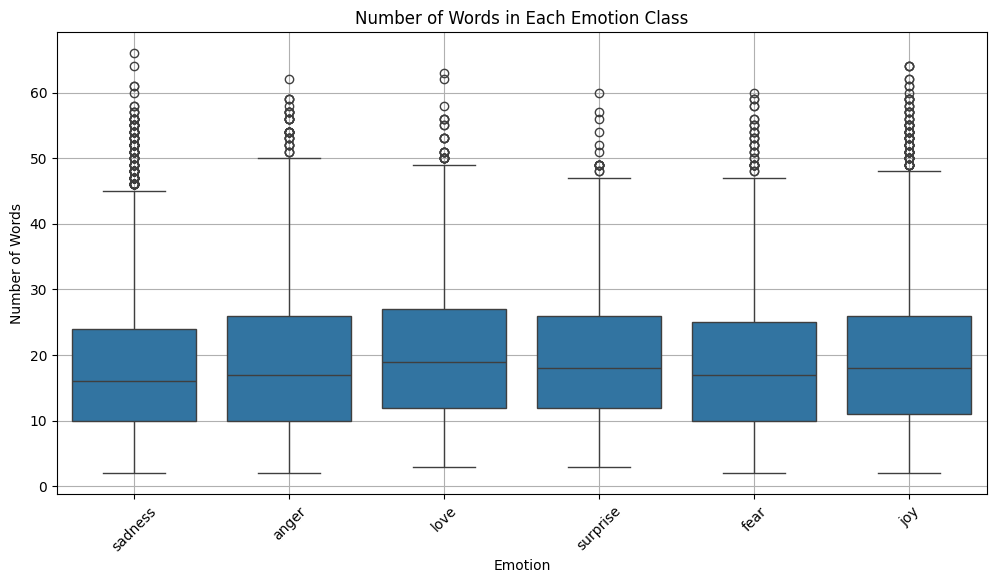

In [40]:
df_train["num_words"] = df_train["text"].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.boxplot(x="label_name", y="num_words", data=df_train)
plt.title("Number of Words in Each Emotion Class")
plt.xlabel("Emotion")
plt.ylabel("Number of Words")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
